In [1]:
#all libraries that are needed are imported here
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors 
import random 
import math 
import time 
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.svm import SVR 
from sklearn.metrics import mean_squared_error,mean_absolute_error 
import datetime 
import operator 
plt.style.use('fivethirtyeight')
%matplotlib inline 

In [2]:
#READING DATA FROM VARIOUS DATASETS WITH CONFIRMED RECOVERED AND DEAD CASES

#THIS DATASET GIVES THE UPTO DATE RECORD OF THE COVID CASES 

confirmed_cases=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
recovered_cases=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
deaths_reported=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')

In [3]:
confirmed_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20,7/14/20,7/15/20,7/16/20,7/17/20,7/18/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,21459,22142,22890,23546,24102,24766,25527,26310,26874,27532,27878,28424,28833,29157,29481,29640,30175,30451,30616,30967,31238,31517,31836,32022,32324,32672,32951,33190,33384,33594,33908,34194,34366,34451,34455,34740,34994,35070,35229,35301
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1299,1341,1385,1416,1464,1521,1590,1672,1722,1788,1838,1891,1962,1995,2047,2114,2192,2269,2330,2402,2466,2535,2580,2662,2752,2819,2893,2964,3038,3106,3188,3278,3371,3454,3571,3667,3752,3851,3906,4008
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,10382,10484,10589,10698,10810,10919,11031,11147,11268,11385,11504,11631,11771,11920,12076,12248,12445,12685,12968,13273,13571,13907,14272,14657,15070,15500,15941,16404,16879,17348,17808,18242,18712,19195,19689,20216,20770,21355,21948,22549
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,852,852,852,853,853,853,853,854,854,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,858,861,862,877,880,880
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,96,113,118,130,138,140,142,148,155,166,172,176,183,186,189,197,212,212,259,267,276,284,291,315,328,346,346,346,386,386,396,458,462,506,525,541,576,607,638,687


In [4]:
recovered_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20,7/14/20,7/15/20,7/16/20,7/17/20,7/18/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2651,3013,3326,3928,4201,4725,5164,5508,6158,7660,7962,8292,8764,8841,9260,9869,10174,10306,10674,12604,13934,14131,15651,16041,17331,19164,19366,20103,20179,20700,20847,20882,21135,21216,21254,21454,22456,22824,23151,23273
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,960,980,1001,1034,1039,1044,1055,1064,1077,1086,1114,1126,1134,1159,1195,1217,1250,1298,1346,1384,1438,1459,1516,1559,1592,1637,1657,1702,1744,1791,1832,1875,1881,1946,2014,2062,2091,2137,2214,2264
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,6951,7074,7255,7322,7420,7606,7735,7842,7943,8078,8196,8324,8422,8559,8674,8792,8920,9066,9202,9371,9674,9897,10040,10342,10832,11181,11492,11884,12094,12329,12637,13124,13124,13743,14019,14295,14792,15107,15430,15744
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,757,759,780,781,781,781,789,789,791,792,792,792,792,796,797,797,797,799,799,799,799,799,799,800,800,800,800,800,800,802,802,803,803,803,803,803,803,803,803,803
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,38,40,41,42,61,61,64,64,64,64,66,66,77,77,77,77,81,81,81,81,93,93,97,97,107,108,108,108,117,117,117,117,118,118,118,118,124,124,199,210


In [5]:
deaths_reported.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20,7/14/20,7/15/20,7/16/20,7/17/20,7/18/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,384,405,426,446,451,471,478,491,504,546,548,569,581,598,618,639,675,683,703,721,733,746,774,807,819,826,864,898,920,936,957,971,994,1010,1012,1048,1094,1113,1147,1164
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,34,34,35,36,36,36,36,37,38,39,42,43,44,44,45,47,49,51,53,55,58,62,65,69,72,74,76,79,81,83,83,85,89,93,95,97,101,104,107,111
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,724,732,741,751,760,767,777,788,799,811,825,837,845,852,861,869,878,885,892,897,905,912,920,928,937,946,952,959,968,978,988,996,1004,1011,1018,1028,1040,1052,1057,1068
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,51,51,51,51,51,51,51,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,4,4,5,5,6,6,6,6,7,8,8,9,9,10,10,10,10,10,10,11,11,13,15,17,18,19,19,19,21,21,22,23,23,26,26,26,27,28,29,29


In [6]:
#obtaining today's data in the latest_data


latest_data=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/07-02-2020.csv')

In [7]:

latest_data.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incidence_Rate,Case-Fatality_Ratio
0,45001.0,Abbeville,South Carolina,US,2020-07-03 04:33:54,34.223334,-82.461707,119,0,0,119,"Abbeville, South Carolina, US",485.179598,0.000000
1,22001.0,Acadia,Louisiana,US,2020-07-03 04:33:54,30.295065,-92.414197,945,37,0,908,"Acadia, Louisiana, US",1523.088081,3.915344
2,51001.0,Accomack,Virginia,US,2020-07-03 04:33:54,37.767072,-75.632346,1042,14,0,1028,"Accomack, Virginia, US",3224.408962,1.343570
3,16001.0,Ada,Idaho,US,2020-07-03 04:33:54,43.452658,-116.241552,2336,23,0,2313,"Ada, Idaho, US",485.062927,0.984589
4,19001.0,Adair,Iowa,US,2020-07-03 04:33:54,41.330756,-94.471059,15,0,0,15,"Adair, Iowa, US",209.731544,0.000000


In [8]:
#TO DISPLAY THE COLUMN NAMES 
#cols=confirmed_cases.columns -------> can also be used 
cols=confirmed_cases.keys()
cols

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '7/9/20', '7/10/20', '7/11/20', '7/12/20', '7/13/20', '7/14/20',
       '7/15/20', '7/16/20', '7/17/20', '7/18/20'],
      dtype='object', length=183)

In [9]:
#using "loc" we access the required group of rows and columns we need 
#so we want all the rows and the columns that have the dates from 22nd Jan upto today 
confirmed=confirmed_cases.loc[:,cols[4]:cols[-1]]
deaths=deaths_reported.loc[:,cols[4]:cols[-1]]
recovered=recovered_cases.loc[:,cols[4]:cols[-1]]

In [10]:
confirmed



#we can observe that we have obtained the data which has only the dates

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20,7/14/20,7/15/20,7/16/20,7/17/20,7/18/20
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,...,21459,22142,22890,23546,24102,24766,25527,26310,26874,27532,27878,28424,28833,29157,29481,29640,30175,30451,30616,30967,31238,31517,31836,32022,32324,32672,32951,33190,33384,33594,33908,34194,34366,34451,34455,34740,34994,35070,35229,35301
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1299,1341,1385,1416,1464,1521,1590,1672,1722,1788,1838,1891,1962,1995,2047,2114,2192,2269,2330,2402,2466,2535,2580,2662,2752,2819,2893,2964,3038,3106,3188,3278,3371,3454,3571,3667,3752,3851,3906,4008
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,...,10382,10484,10589,10698,10810,10919,11031,11147,11268,11385,11504,11631,11771,11920,12076,12248,12445,12685,12968,13273,13571,13907,14272,14657,15070,15500,15941,16404,16879,17348,17808,18242,18712,19195,19689,20216,20770,21355,21948,22549
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,852,852,852,853,853,853,853,854,854,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,858,861,862,877,880,880
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,96,113,118,130,138,140,142,148,155,166,172,176,183,186,189,197,212,212,259,267,276,284,291,315,328,346,346,346,386,386,396,458,462,506,525,541,576,607,638,687
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,514,611,632,639,659,661,662,671,683,688,693,698,698,702,707,710,711,712,713,713,713,714,715,717,719,719,720,721,724,724,726,727,727,729,732,732,737,740,741,743
262,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,524,560,591,632,705,728,844,885,902,909,919,922,941,967,992,1015,1076,1089,1103,1118,1128,1158,1190,1221,1240,1248,1265,1284,1297,1318,1356,1380,1389,1465,1498,1516,1526,1552,1576,1581
263,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,141,162,162,163,176,176,176,197,197,210,210,247,247,247,265,265,272,272,272,272,272,303,303,303,309,309,311,311,311,313,314,314,317,317,317,321,321,328,328,328
264,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,4690,4763,4834,4902,4971,5035,5097,5160,5221,5279,5338,5399,5457,5513,5567,5630,5691,5747,5799,5849,5900,5900,6005,6058,6058,6159,6213,6262,6315,6364,6410,6457,6506,6552,6596,6643,6695,6741,6786,6834


In [11]:
dates=confirmed.keys()   #dates has the columns of confirmed which has only the dates now 

#Creating empty arrays to append the data later 

world_cases=[]
total_deaths=[]
mortality_rate=[]
recovery_rate=[]
total_recovered=[]
total_active=[]

#we will look upon the analysis for india,china,italy and US alone.

#INDIA 
india_cases=[]
india_deaths=[]
india_recoveries=[]

#CHINA
china_cases=[]
china_deaths=[]
china_recoveries=[]

#ITALY 
italy_cases=[]
italy_deaths=[]
italy_recoveries=[]

#US
us_cases=[]
us_deaths=[]
us_recoveries=[]

#Brazil 
brazil_cases=[]
brazil_deaths=[]
brazil_recoveries=[]

#Russia 
russia_cases=[]
russia_deaths=[]
russia_recoveries=[]



In [12]:
#using a loop to append the data in the arrays for each date in dates 

for i in dates:
    confirmed_sum=confirmed[i].sum()
    death_sum=deaths[i].sum()
    recovered_sum=recovered[i].sum()
    
    world_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    total_recovered.append(recovered_sum)
    total_active.append(confirmed_sum-death_sum-recovered_sum) #JUST TO GET THE ACTIVE CASES WE REMOVE DEATH AND RECOVERED CASES
    
    mortality_rate.append(death_sum/confirmed_sum)
    recovery_rate.append(recovered_sum/confirmed_sum)
    
    india_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='India'][i].sum())
    china_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='China'][i].sum())
    italy_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='Italy'][i].sum())
    us_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='US'][i].sum())
    brazil_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='Brazil'][i].sum())
    russia_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='Russia'][i].sum())
    
    
    india_deaths.append(deaths_reported[deaths_reported['Country/Region']=='India'][i].sum())
    china_deaths.append(deaths_reported[deaths_reported['Country/Region']=='China'][i].sum())
    italy_deaths.append(deaths_reported[deaths_reported['Country/Region']=='Italy'][i].sum())
    us_deaths.append(deaths_reported[deaths_reported['Country/Region']=='US'][i].sum())
    brazil_deaths.append(deaths_reported[deaths_reported['Country/Region']=='Brazil'][i].sum())
    russia_deaths.append(deaths_reported[deaths_reported['Country/Region']=='Russia'][i].sum())
    
    india_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='India'][i].sum())
    china_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='China'][i].sum())
    italy_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='Italy'][i].sum())
    us_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='US'][i].sum())
    brazil_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='Brazil'][i].sum())
    russia_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='Russia'][i].sum())



In [13]:
world_cases

[555,
 654,
 941,
 1434,
 2118,
 2927,
 5578,
 6166,
 8234,
 9927,
 12038,
 16787,
 19887,
 23898,
 27643,
 30802,
 34395,
 37129,
 40159,
 42768,
 44810,
 45228,
 60381,
 66908,
 69050,
 71234,
 73269,
 75151,
 75651,
 76211,
 76840,
 78601,
 78979,
 79543,
 80396,
 81373,
 82737,
 84114,
 86009,
 88386,
 90360,
 92938,
 95237,
 98028,
 101971,
 106009,
 109960,
 113860,
 118884,
 126547,
 132297,
 146704,
 157795,
 168941,
 183600,
 199444,
 219037,
 246955,
 276564,
 308842,
 342255,
 384420,
 425559,
 476376,
 539336,
 603736,
 671344,
 730921,
 795560,
 871976,
 948197,
 1029598,
 1112752,
 1193128,
 1264846,
 1337518,
 1414391,
 1498166,
 1584791,
 1672449,
 1749169,
 1845951,
 1915545,
 1985472,
 2066301,
 2163013,
 2250737,
 2324265,
 2404790,
 2478129,
 2553379,
 2630185,
 2719198,
 2806138,
 2890259,
 2963206,
 3031910,
 3107209,
 3184255,
 3267936,
 3354984,
 3435571,
 3513207,
 3589284,
 3669273,
 3759295,
 3848381,
 3939898,
 4023533,
 4099779,
 4176020,
 4259619,
 4344371

In [14]:
total_deaths 

[17,
 18,
 26,
 42,
 56,
 82,
 131,
 133,
 171,
 213,
 259,
 362,
 426,
 492,
 564,
 634,
 719,
 806,
 906,
 1013,
 1113,
 1118,
 1371,
 1523,
 1666,
 1770,
 1868,
 2008,
 2123,
 2248,
 2252,
 2459,
 2470,
 2630,
 2710,
 2771,
 2814,
 2873,
 2942,
 2996,
 3085,
 3160,
 3255,
 3348,
 3460,
 3559,
 3803,
 3987,
 4266,
 4611,
 4916,
 5413,
 5830,
 6471,
 7151,
 7955,
 8852,
 9958,
 11436,
 13142,
 14840,
 16757,
 19027,
 21804,
 24811,
 28329,
 32008,
 35481,
 39645,
 44489,
 50043,
 56348,
 62333,
 68174,
 73195,
 79027,
 86929,
 93664,
 101293,
 108565,
 114634,
 120365,
 126112,
 133011,
 141323,
 148606,
 157497,
 163968,
 168538,
 173981,
 181138,
 187893,
 194743,
 201417,
 206995,
 210878,
 215527,
 221990,
 228758,
 234720,
 239897,
 245222,
 248675,
 252803,
 258674,
 265343,
 270752,
 276320,
 280585,
 284151,
 287624,
 293171,
 298399,
 303667,
 308882,
 313053,
 316382,
 319673,
 324457,
 329342,
 334128,
 339412,
 343401,
 346541,
 347719,
 351922,
 357135,
 361836,
 366578,


In [15]:
#total number of cases globally
confirmed_sum

14292922

In [16]:
#total number of cases recovered globally 
recovered_sum


8045827

In [17]:
#this gives the number of cases excluding deaths and recovered 
#hence only people who are affected at present on aeach day are listed below 
total_active 

[510,
 606,
 879,
 1353,
 2010,
 2784,
 5340,
 5907,
 7920,
 9492,
 11495,
 15953,
 18838,
 22554,
 25955,
 28681,
 31665,
 33707,
 36009,
 37809,
 39014,
 38960,
 52715,
 57327,
 57989,
 58599,
 58818,
 58791,
 57407,
 55786,
 55698,
 53256,
 53115,
 51686,
 49781,
 48218,
 46646,
 44530,
 43285,
 42674,
 41673,
 41550,
 40812,
 40884,
 42646,
 44091,
 45463,
 47380,
 50214,
 54934,
 59058,
 71041,
 79344,
 86439,
 98364,
 110652,
 126865,
 152040,
 177726,
 204034,
 229534,
 269317,
 298547,
 340804,
 392392,
 444505,
 499940,
 546577,
 591615,
 649701,
 705278,
 763333,
 825055,
 879177,
 932035,
 982242,
 1027825,
 1076149,
 1129809,
 1188376,
 1232780,
 1304428,
 1341109,
 1379044,
 1414894,
 1473495,
 1526208,
 1569342,
 1613643,
 1659537,
 1692803,
 1732425,
 1785797,
 1816030,
 1866794,
 1907255,
 1943507,
 1979077,
 2007187,
 2019935,
 2063575,
 2097920,
 2139780,
 2177665,
 2215178,
 2252613,
 2296793,
 2346220,
 2372041,
 2411127,
 2436901,
 2477918,
 2501600,
 2553702,
 259

In [18]:
#as per the data initially India had very less number of cases
#but now we have reached alarming numbers!!!!!!!!!!!!!
india_cases


[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 5,
 5,
 28,
 30,
 31,
 34,
 39,
 43,
 56,
 62,
 73,
 82,
 102,
 113,
 119,
 142,
 156,
 194,
 244,
 330,
 396,
 499,
 536,
 657,
 727,
 887,
 987,
 1024,
 1251,
 1397,
 1998,
 2543,
 2567,
 3082,
 3588,
 4778,
 5311,
 5916,
 6725,
 7598,
 8446,
 9205,
 10453,
 11487,
 12322,
 13430,
 14352,
 15722,
 17615,
 18539,
 20080,
 21370,
 23077,
 24530,
 26283,
 27890,
 29451,
 31324,
 33062,
 34863,
 37257,
 39699,
 42505,
 46437,
 49400,
 52987,
 56351,
 59695,
 62808,
 67161,
 70768,
 74292,
 78055,
 81997,
 85784,
 90648,
 95698,
 100328,
 106475,
 112028,
 118226,
 124794,
 131423,
 138536,
 144950,
 150793,
 158086,
 165386,
 173491,
 181827,
 190609,
 198370,
 207191,
 216824,
 226713,
 236184,
 246622,
 257486,
 265928,
 276146,
 286605,
 297535,
 308993,
 320922,
 332424,
 343091,
 354065,
 366946,
 380532,
 395048,
 410451,
 

In [19]:
#numbner of cases getting recvered every day in India 
india_recoveries

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 13,
 13,
 14,
 14,
 15,
 20,
 23,
 27,
 27,
 40,
 43,
 45,
 73,
 84,
 95,
 102,
 123,
 148,
 191,
 192,
 229,
 229,
 375,
 421,
 506,
 620,
 774,
 969,
 1080,
 1181,
 1359,
 1432,
 1768,
 2041,
 2463,
 2854,
 3273,
 3975,
 4370,
 5012,
 5498,
 5939,
 6523,
 7137,
 7747,
 8437,
 9068,
 10007,
 10819,
 11775,
 12847,
 14142,
 15331,
 16776,
 17887,
 19301,
 20969,
 22549,
 24420,
 26400,
 27969,
 30258,
 34224,
 36795,
 39233,
 42309,
 45422,
 48553,
 51824,
 54385,
 57692,
 60706,
 64277,
 67749,
 70920,
 82627,
 86936,
 91852,
 95754,
 100285,
 104071,
 108450,
 113233,
 118695,
 123848,
 129095,
 134670,
 135206,
 147195,
 154330,
 162379,
 169798,
 180013,
 186935,
 194325,
 204711,
 213831,
 227728,
 237196,
 248190,
 258685,
 271697,
 285637,
 295881,
 309713,
 321723,
 33

In [20]:
#deaths in india 
india_deaths

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 2,
 2,
 2,
 2,
 3,
 3,
 4,
 5,
 4,
 7,
 10,
 10,
 12,
 20,
 20,
 24,
 27,
 32,
 35,
 58,
 72,
 72,
 86,
 99,
 136,
 150,
 178,
 226,
 246,
 288,
 331,
 358,
 393,
 405,
 448,
 486,
 521,
 559,
 592,
 645,
 681,
 721,
 780,
 825,
 881,
 939,
 1008,
 1079,
 1154,
 1223,
 1323,
 1391,
 1566,
 1693,
 1785,
 1889,
 1985,
 2101,
 2212,
 2294,
 2415,
 2551,
 2649,
 2753,
 2871,
 3025,
 3156,
 3302,
 3434,
 3584,
 3726,
 3868,
 4024,
 4172,
 4344,
 4534,
 4711,
 4980,
 5185,
 5408,
 5608,
 5829,
 6088,
 6363,
 6649,
 6946,
 7207,
 7473,
 7750,
 8102,
 8498,
 8884,
 9195,
 9520,
 9900,
 11903,
 12237,
 12573,
 12948,
 13254,
 13699,
 14011,
 14476,
 14894,
 15301,
 15685,
 16095,
 16475,
 16893,
 17400,
 17834,
 18213,
 18655,
 19268,
 19693,
 20159,
 20642,
 21129,
 21604,
 22123,
 22673,
 23

In [21]:
#analysing the daily data 
#user defined function 

#finding the difference between today and the previous day 
#to obtain the increase of cases

def daily_increase(data):
    d=[]
    for i in range (len(data)):
        if i==0:
            d.append(data[0])
        else:
            d.append(data[i]-data[i-1])  
    return d


In [22]:
#confirmed cases using the function
world_daily_increase=daily_increase(world_cases)
india_daily_increase=daily_increase(india_cases)
china_daily_increase=daily_increase(china_cases)
italy_daily_increase=daily_increase(italy_cases)
us_daily_increase=daily_increase(us_cases)
brazil_daily_increase=daily_increase(brazil_cases)
russia_daily_increase=daily_increase(russia_cases)

#similarly this data can be checked for number of deaths also 
world_daily_death=daily_increase(total_deaths)
india_daily_death=daily_increase(india_deaths)
china_daily_death=daily_increase(china_deaths)
italy_daily_death=daily_increase(italy_deaths)
us_daily_death=daily_increase(us_deaths)
brazil_daily_death=daily_increase(brazil_deaths)
russia_daily_death=daily_increase(russia_deaths)

#now we check the improvement in recovery day by day 

world_daily_recovery=daily_increase(total_recovered)
india_daily_recovery=daily_increase(india_recoveries)
china_daily_recovery=daily_increase(china_recoveries)
italy_daily_recovery=daily_increase(italy_recoveries)
us_daily_recovery=daily_increase(us_recoveries)
brazil_daily_recovery=daily_increase(brazil_recoveries)
russia_daily_recovery=daily_increase(russia_recoveries)


In [23]:
russia_daily_increase

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 9,
 0,
 4,
 0,
 3,
 0,
 8,
 17,
 14,
 4,
 27,
 24,
 33,
 52,
 54,
 53,
 61,
 71,
 57,
 163,
 182,
 196,
 228,
 270,
 302,
 501,
 440,
 771,
 601,
 582,
 658,
 954,
 1154,
 1175,
 1459,
 1786,
 1667,
 2186,
 2558,
 2774,
 3388,
 3448,
 4070,
 4785,
 6060,
 4268,
 5642,
 5236,
 4774,
 5849,
 5966,
 6361,
 6198,
 6411,
 5841,
 7099,
 7933,
 9623,
 10633,
 10581,
 10102,
 10559,
 11231,
 10699,
 10817,
 11012,
 11656,
 10899,
 10028,
 9974,
 10598,
 9200,
 9709,
 8926,
 9263,
 8764,
 8849,
 8894,
 9434,
 8599,
 8946,
 8915,
 8338,
 8371,
 8572,
 8952,
 9268,
 8485,
 8858,
 8529,
 8823,
 8718,
 8846,
 8971,
 8970,
 8587,
 8393,
 8777,
 8961,
 8697,
 8809,
 8217,
 8241,
 7824,
 7772,
 7971,
 7870,
 7717,
 7586,
 7413,
 7165,
 7105,
 6788,
 6843,
 6784,
 6683,
 6683,
 6550,
 6752,
 6710,
 6623,
 6719,
 6569,
 6363,
 65

In [24]:
india_daily_death

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 -1,
 3,
 3,
 0,
 2,
 8,
 0,
 4,
 3,
 5,
 3,
 23,
 14,
 0,
 14,
 13,
 37,
 14,
 28,
 48,
 20,
 42,
 43,
 27,
 35,
 12,
 43,
 38,
 35,
 38,
 33,
 53,
 36,
 40,
 59,
 45,
 56,
 58,
 69,
 71,
 75,
 69,
 100,
 68,
 175,
 127,
 92,
 104,
 96,
 116,
 111,
 82,
 121,
 136,
 98,
 104,
 118,
 154,
 131,
 146,
 132,
 150,
 142,
 142,
 156,
 148,
 172,
 190,
 177,
 269,
 205,
 223,
 200,
 221,
 259,
 275,
 286,
 297,
 261,
 266,
 277,
 352,
 396,
 386,
 311,
 325,
 380,
 2003,
 334,
 336,
 375,
 306,
 445,
 312,
 465,
 418,
 407,
 384,
 410,
 380,
 418,
 507,
 434,
 379,
 442,
 613,
 425,
 466,
 483,
 487,
 475,
 519,
 550,
 501,
 553,
 582,
 605,
 688,
 671,
 543]

In [25]:
india_daily_recovery

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 9,
 0,
 1,
 0,
 1,
 5,
 3,
 4,
 0,
 13,
 3,
 2,
 28,
 11,
 11,
 7,
 21,
 25,
 43,
 1,
 37,
 0,
 146,
 46,
 85,
 114,
 154,
 195,
 111,
 101,
 178,
 73,
 336,
 273,
 422,
 391,
 419,
 702,
 395,
 642,
 486,
 441,
 584,
 614,
 610,
 690,
 631,
 939,
 812,
 956,
 1072,
 1295,
 1189,
 1445,
 1111,
 1414,
 1668,
 1580,
 1871,
 1980,
 1569,
 2289,
 3966,
 2571,
 2438,
 3076,
 3113,
 3131,
 3271,
 2561,
 3307,
 3014,
 3571,
 3472,
 3171,
 11707,
 4309,
 4916,
 3902,
 4531,
 3786,
 4379,
 4783,
 5462,
 5153,
 5247,
 5575,
 536,
 11989,
 7135,
 8049,
 7419,
 10215,
 6922,
 7390,
 10386,
 9120,
 13897,
 9468,
 10994,
 10495,
 13012,
 13940,
 10244,
 13832,
 12010,
 13099,
 13090,
 11948,
 20032,
 14335,
 14856,
 15350,
 15501,
 16897,
 19547,
 19135,
 19873,
 19232,
 18853,
 17989,
 205

In [26]:
world_daily_recovery  #across the globe 

[28,
 2,
 6,
 3,
 13,
 9,
 46,
 19,
 17,
 79,
 62,
 188,
 151,
 229,
 272,
 363,
 524,
 605,
 628,
 702,
 737,
 467,
 1145,
 1763,
 1337,
 1470,
 1718,
 1769,
 1769,
 2056,
 713,
 3996,
 508,
 1833,
 2678,
 2479,
 2893,
 3434,
 3071,
 2934,
 2886,
 2626,
 2942,
 2626,
 2069,
 2494,
 2335,
 1799,
 1911,
 2598,
 1321,
 1927,
 2371,
 3410,
 2054,
 2752,
 2483,
 1637,
 2445,
 4264,
 6215,
 465,
 9639,
 5783,
 8365,
 8769,
 8494,
 9467,
 15437,
 13486,
 15090,
 17041,
 15447,
 20413,
 13839,
 16633,
 23388,
 28716,
 25336,
 21819,
 26247,
 19403,
 27166,
 25093,
 36667,
 30828,
 26120,
 23923,
 31654,
 22002,
 34827,
 30429,
 28791,
 50033,
 27779,
 28603,
 27803,
 33266,
 42168,
 64971,
 38231,
 40917,
 32323,
 34064,
 36605,
 45918,
 39497,
 36522,
 53549,
 33594,
 46994,
 37035,
 55842,
 39735,
 47989,
 56591,
 40886,
 52898,
 52165,
 58913,
 51265,
 108651,
 54971,
 55440,
 63723,
 55214,
 63393,
 66857,
 77327,
 70472,
 76308,
 54895,
 104123,
 79142,
 70029,
 69156,
 72202,
 55093,
 1

In [27]:
unique_countries=list(latest_data['Country_Region'].unique())
unique_countries

['US',
 'Italy',
 'Brazil',
 'Russia',
 'Mexico',
 'Japan',
 'Canada',
 'Colombia',
 'Peru',
 'Spain',
 'India',
 'United Kingdom',
 'China',
 'Chile',
 'Netherlands',
 'Australia',
 'Pakistan',
 'Germany',
 'Sweden',
 'Ukraine',
 'Denmark',
 'France',
 'Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burma',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Central African Republic',
 'Chad',
 'Comoros',
 'Congo (Brazzaville)',
 'Congo (Kinshasa)',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czechia',
 'Diamond Princess',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Et

In [28]:
####################### FOR VISUALISATIONS ################################

country_confirmed_cases=[]
country_death_cases=[]
country_active_cases=[]
country_recovery_cases=[]
country_mortality_rate=[]

no_cases=[]

for i in unique_countries:
    cases=latest_data[latest_data['Country_Region']==i]['Confirmed'].sum()
    if cases>0:
        country_confirmed_cases.append(cases)
    else:
        no_cases.append(i)
for i in no_cases:
    unique_countries.remove()
    
    
   #SORTING THE COUNTRIES BY THE NUMBER OF CONFIRMED CASES

unique_countries=[k for k,v in sorted(zip(unique_countries,country_confirmed_cases),key=operator.itemgetter(1),reverse=True)]
for i in range (len(unique_countries)):
    country_confirmed_cases[i]=latest_data[latest_data['Country_Region']==unique_countries[i]]['Confirmed'].sum()
    country_death_cases.append(latest_data[latest_data['Country_Region']==unique_countries[i]]['Deaths'].sum())
    country_recovery_cases.append(latest_data[latest_data['Country_Region']==unique_countries[i]]['Recovered'].sum())
    country_active_cases.append(country_confirmed_cases[i]-country_death_cases[i]-country_recovery_cases[i])
    country_mortality_rate.append(country_death_cases[i]/country_confirmed_cases[i])
    

In [29]:
country_df=pd.DataFrame({'Country Name':unique_countries,'Number of confirmed cases':country_confirmed_cases,
                         'Number of deaths':country_death_cases,'Number of Recoveries':country_recovery_cases,
                        'Number of active cases':country_active_cases,
                        'Mortality rate':country_mortality_rate})

#number of cases  per country/region 

country_df.style.background_gradient(cmap='Blues')




,Country Name,Number of confirmed cases,Number of deaths,Number of Recoveries,Number of active cases,Mortality rate
0,US,2739879,128740,781970,1829169,0.046987
1,Brazil,1496858,61884,957692,477282,0.041343
2,Russia,660231,9668,428276,222287,0.014643
3,India,625544,18213,379892,227439,0.029115
4,Peru,292004,10045,182097,99862,0.034400
5,United Kingdom,285268,44080,1373,239815,0.154521
6,Chile,284541,5920,249247,29374,0.020805
7,Spain,250103,28368,150376,71359,0.113425
8,Italy,240961,34818,191083,15060,0.144496
9,Mexico,238511,29189,183757,25565,0.122380


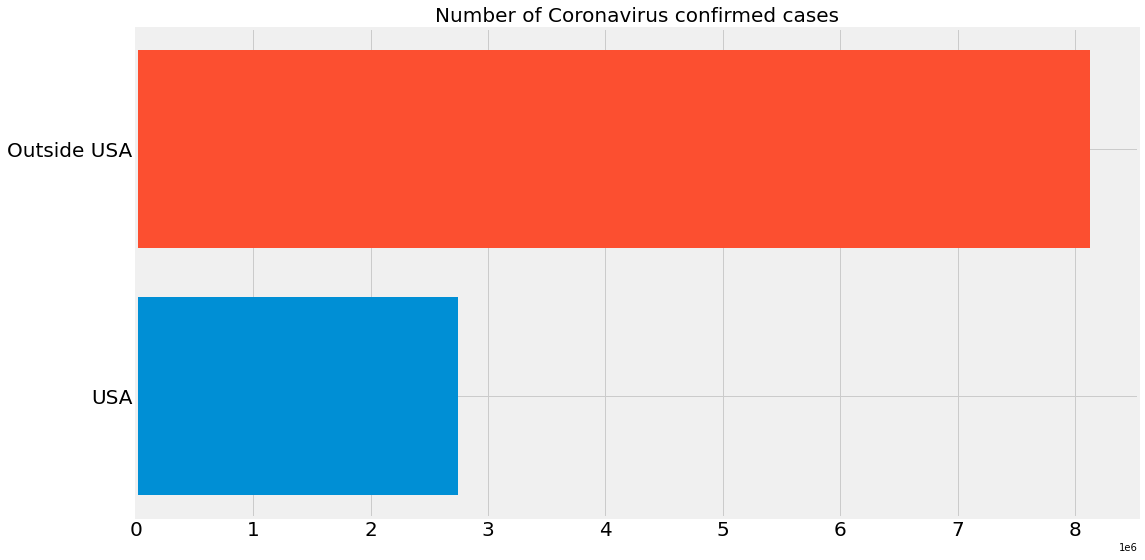

In [30]:
#VISUALIZATIONS FOR US 

USA_confirmed=latest_data[latest_data['Country_Region']=='US']['Confirmed'].sum()

#To find the comparison between The United States and other countries 
#So we take the other areas as outside US by eliminating the confirmed cases in US


outside_USA_confirmed=np.sum(country_confirmed_cases)-USA_confirmed
plt.figure(figsize=(16,9))
plt.barh('USA',USA_confirmed)
plt.barh('Outside USA',outside_USA_confirmed)
plt.title('Number of Coronavirus confirmed cases',size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

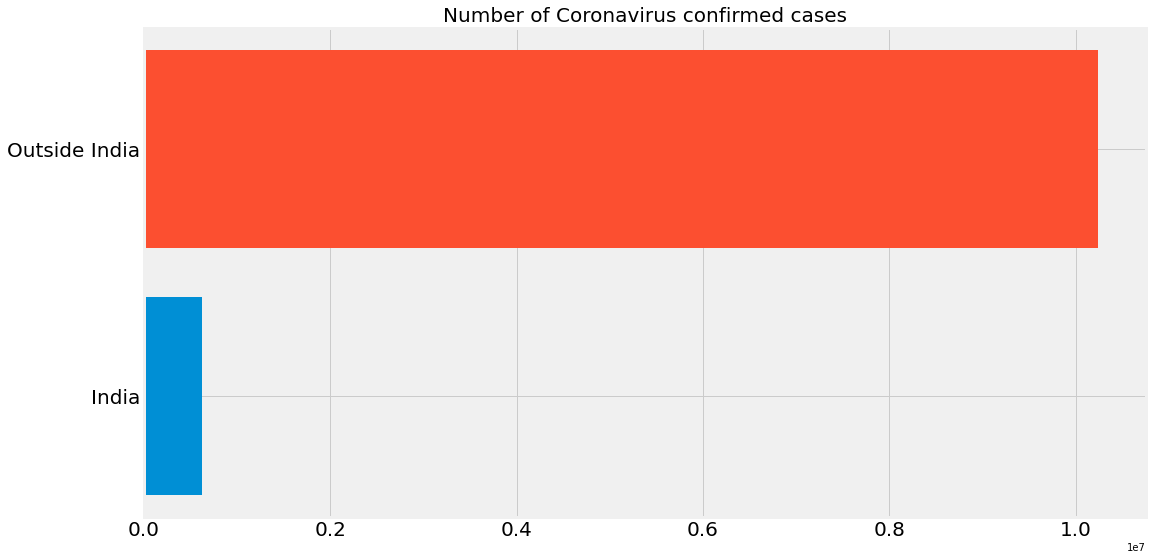

In [31]:
#VISUALIZATIONS FOR INDIA 

India_confirmed=latest_data[latest_data['Country_Region']=='India']['Confirmed'].sum()

#To find the comparison between The United States and other countries 
#So we take the other areas as outside US by eliminating the confirmed cases in US


outside_India_confirmed=np.sum(country_confirmed_cases)-India_confirmed
plt.figure(figsize=(16,9))
plt.barh('India',India_confirmed)
plt.barh('Outside India',outside_India_confirmed)
plt.title('Number of Coronavirus confirmed cases',size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [32]:
print('Outside USA {} cases:'.format(outside_USA_confirmed))
print('USA: {} cases'.format(USA_confirmed))
print('Total: {} cases'.format(USA_confirmed+outside_USA_confirmed))

Outside USA 8129860 cases:
USA: 2739879 cases
Total: 10869739 cases


In [33]:
#Only show 10 countries with the most confirmed cases, the rest are grouped into other category

visual_unique_countries=[]
visual_confirmed_cases=[]
others=np.sum(country_confirmed_cases[10:])  #other than the first 10 rows the rest of the rows 

for i in range(len(country_confirmed_cases[:10])):
    visual_unique_countries.append(unique_countries[i])
    visual_confirmed_cases.append(country_confirmed_cases[i])

visual_unique_countries.append('Others')
visual_confirmed_cases.append(others)

In [34]:
def plot_bar_graphs(x,y,title):
    plt.figure(figsize=(16,9))
    plt.barh(x,y)
    plt.title(title,size=20)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show() 

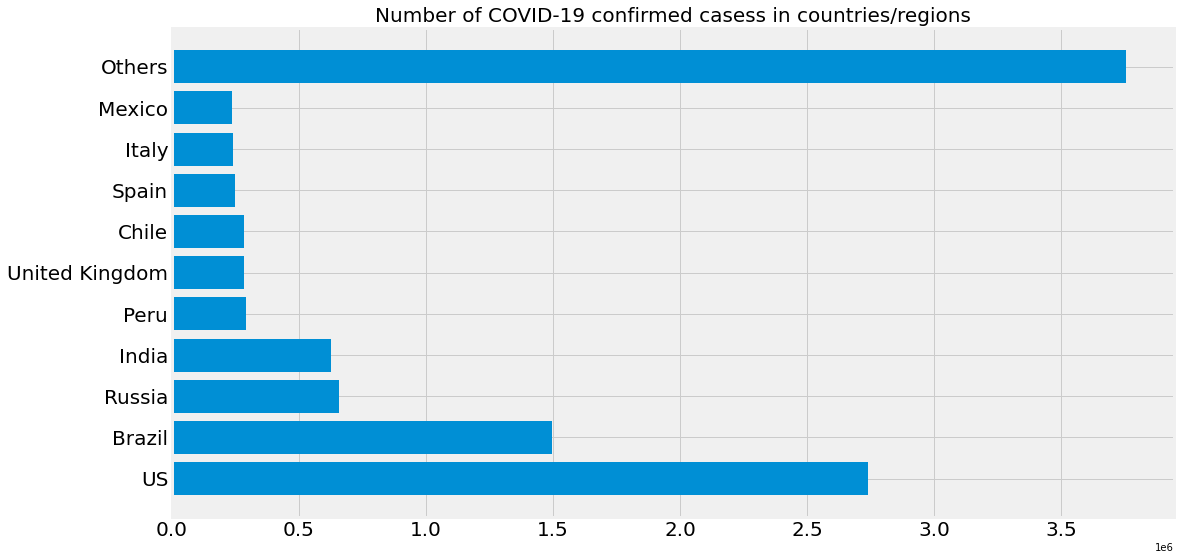

In [35]:
plot_bar_graphs(visual_unique_countries,visual_confirmed_cases,'Number of COVID-19 confirmed casess in countries/regions')

In [36]:
def plot_pie_charts(x,y,title):
    c=random.choices(list(mcolors.CSS4_COLORS.values()),k=len(unique_countries))
    plt.figure(figsize=(15,10))
    plt.title(title,size=20)
    plt.pie(y,colors=c)
    plt.legend(x,loc='best',fontsize=10)
    plt.show()

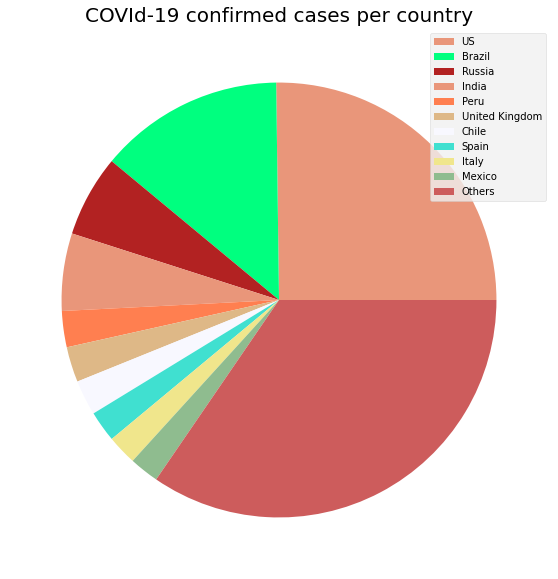

In [37]:
plot_pie_charts(visual_unique_countries,visual_confirmed_cases,'COVId-19 confirmed cases per country')

In [38]:
#since 22nd January, all dates converted to array using numpy
days_since_1_22=np.array([i for i in range(len(dates))]).reshape(-1,1)
world_cases=np.array(world_cases).reshape(-1,1)
total_deaths=np.array(total_deaths).reshape(-1,1)
total_recovered=np.array(total_recovered).reshape(-1,1)

In [39]:
days_in_future=20
future_forecast=np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1,1)
adjusted_dates=future_forecast[:-20]

In [40]:
future_forecast
adjusted_dates

array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
      

In [41]:
#converting all integers to datetime values for better processing of data

start='1/22/2020'
start_date=datetime.datetime.strptime(start,'%m/%d/%Y')
future_forecast_dates=[]
for i in range(len(future_forecast)):
    future_forecast_dates.append((start_date+datetime.timedelta(days=i)).strftime('%m/%d/%Y'))

In [42]:
X_train_confirmed,X_test_confirmed,y_train_confirmed,y_test_confirmed=train_test_split(days_since_1_22,world_cases,test_size=0.25,shuffle=False)


# x is the independent variable and hence is aasigned dates and y being the dependent variable is the number of cases

In [43]:
######################### ******    TRANSFORM OUR DATA FOR POLYNOMIAL REGRESSION  ********    ##################
poly=PolynomialFeatures(degree=2)
poly_X_train_confirmed=poly.fit_transform(X_train_confirmed)
poly_X_test_confirmed=poly.fit_transform(X_test_confirmed)
poly_future_forecast=poly.fit_transform(future_forecast)

In [44]:
# Polynomial Regression 
linear_model=LinearRegression(normalize=True,fit_intercept=False)
linear_model.fit(poly_X_train_confirmed,y_train_confirmed)     #fit using training data
test_linear_pred=linear_model.predict(poly_X_test_confirmed)   
linear_pred=linear_model.predict(poly_future_forecast)
print('mean absolute error',mean_absolute_error(test_linear_pred,y_test_confirmed))
print('mean squared error',mean_squared_error(test_linear_pred,y_test_confirmed))

mean absolute error 269367.7459561735
mean squared error 127056775221.53908


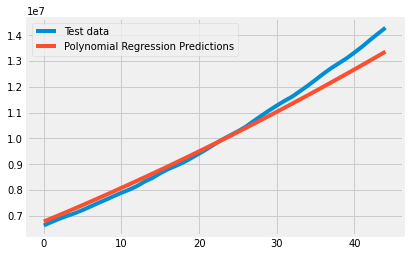

In [45]:
plt.plot(y_test_confirmed)
plt.plot(test_linear_pred)
plt.legend(['Test data','Polynomial Regression Predictions'])

In [46]:
from sklearn.metrics import r2_score
print(r2_score(test_linear_pred,y_test_confirmed))

0.9664790456646465


In [47]:
################## USING SVM #####################

#svm_confirmed=svm_search.best_estimator_

svm_confirmed=SVR(shrinking=True,kernel='poly',gamma=0.01,epsilon=1,degree=3,C=0.1)
svm_confirmed.fit(X_train_confirmed,y_train_confirmed)
svm_pred=svm_confirmed.predict(future_forecast)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


mean absolute error 1050896.9623016466
mean squared error 1314196314076.57


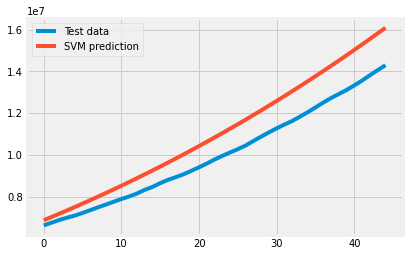

In [48]:
svm_test_pred=svm_confirmed.predict(X_test_confirmed)
plt.plot(y_test_confirmed)
plt.plot(svm_test_pred)
plt.legend(['Test data','SVM prediction'])
print('mean absolute error',mean_absolute_error(svm_test_pred,y_test_confirmed))
print('mean squared error',mean_squared_error(svm_test_pred,y_test_confirmed))

In [49]:
from sklearn.metrics import r2_score
print(r2_score(svm_test_pred,y_test_confirmed))

0.8223424060003109


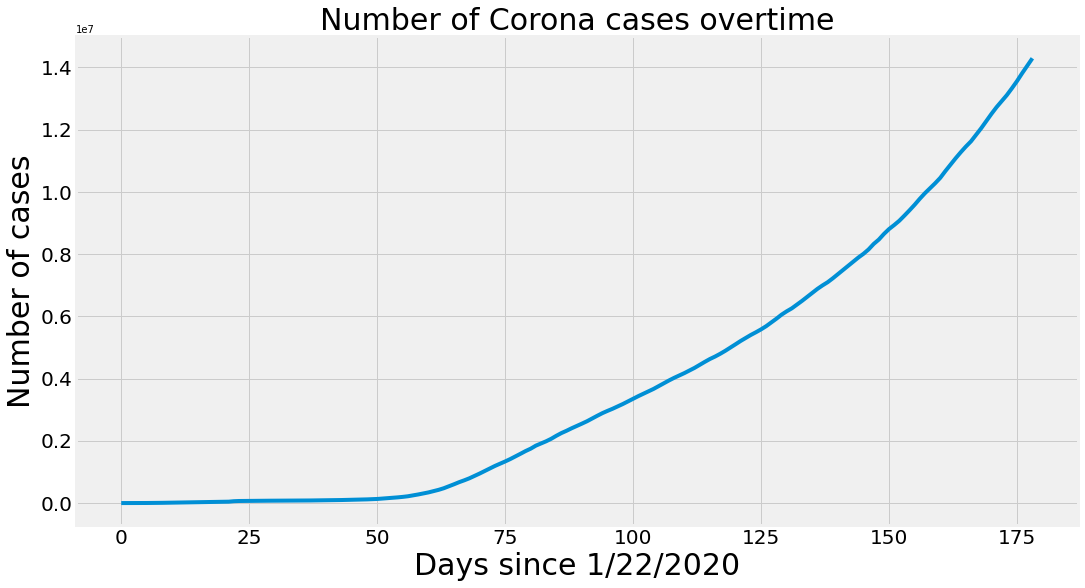

In [50]:
adjusted_dates=np.array(adjusted_dates).reshape(-1,1)
#world_cases=np.array(world_cases).reshape(-1,1)
plt.figure(figsize=(16,9))
plt.plot(adjusted_dates,world_cases)
plt.title('Number of Corona cases overtime',size=30)
plt.xlabel("Days since 1/22/2020",size=30)
plt.ylabel('Number of cases',size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()


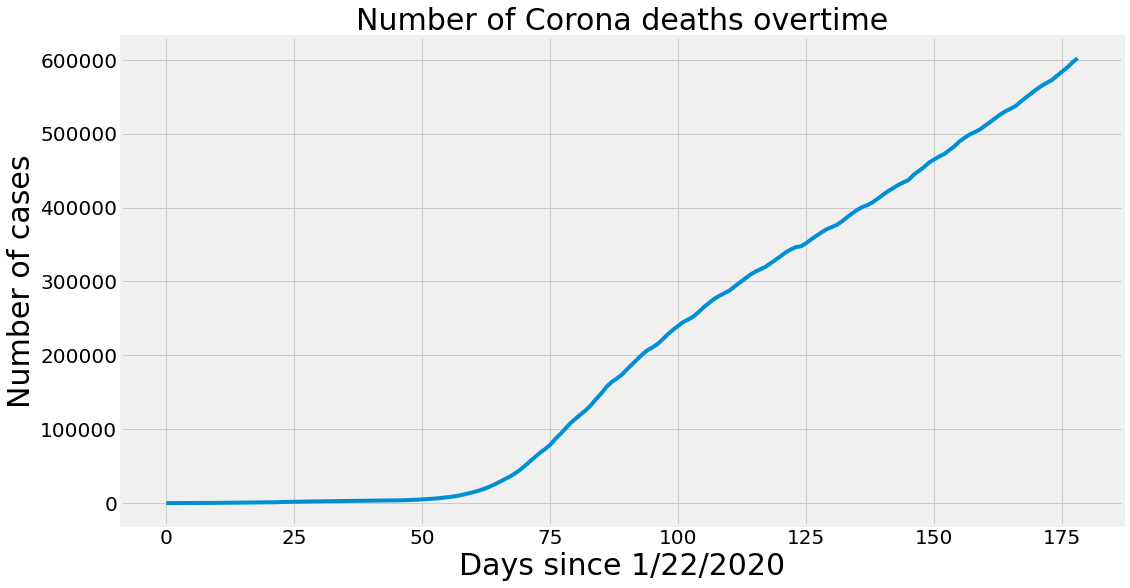

In [51]:
plt.figure(figsize=(16,9))
plt.plot(adjusted_dates,total_deaths)
plt.title('Number of Corona deaths overtime',size=30)
plt.xlabel("Days since 1/22/2020",size=30)
plt.ylabel('Number of cases',size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()


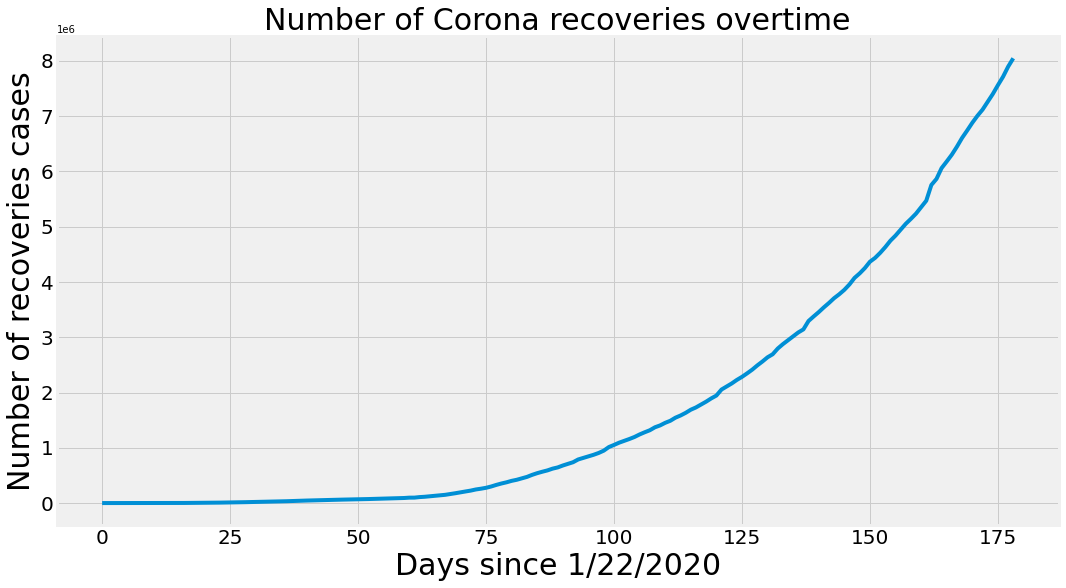

In [52]:
plt.figure(figsize=(16,9))
plt.plot(adjusted_dates,total_recovered)
plt.title('Number of Corona recoveries overtime',size=30)
plt.xlabel("Days since 1/22/2020",size=30)
plt.ylabel('Number of recoveries cases',size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

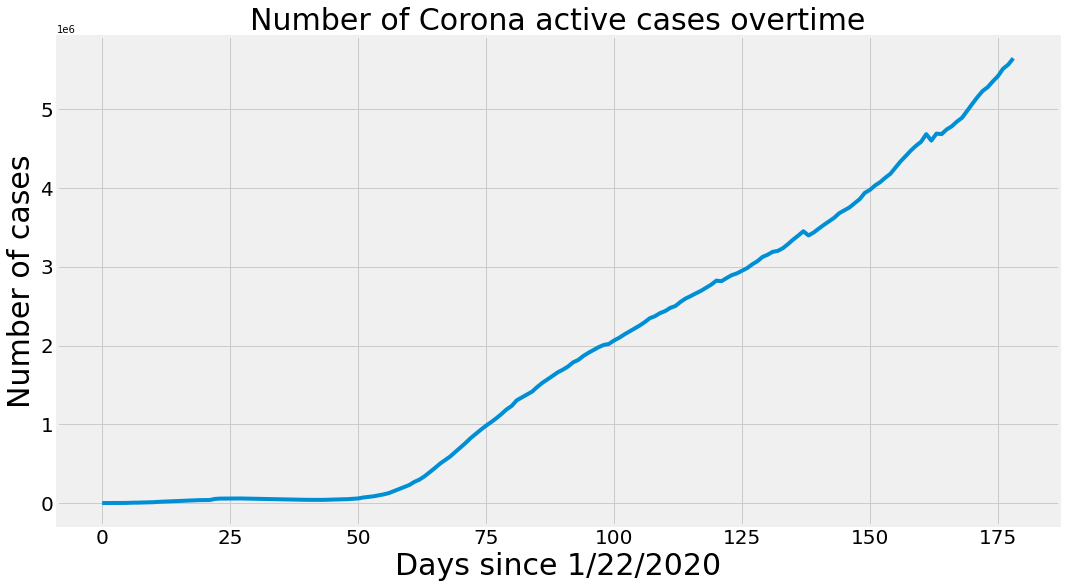

In [53]:
plt.figure(figsize=(16,9))
plt.plot(adjusted_dates,total_active)
plt.title('Number of Corona active cases overtime',size=30)
plt.xlabel("Days since 1/22/2020",size=30)
plt.ylabel('Number of cases',size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()


In [56]:
def plot_predictions(x,y,pred,algo_name,color):
  plt.figure(figsize=(16,9))
  plt.plot(x,y)
  plt.plot(future_forecast,pred,linestyle='dashed',color=color)
  plt.title('Number of coronavirus cases over time',size=30)
  plt.xlabel('days since 1/22/2020',size=30)
  plt.ylabel('number of cases',size=30)
  plt.legend(['confirmed cases',algo_name],prop={'size':20})
  plt.xticks(size=20)
  plt.yticks(size=20)
  plt.show()

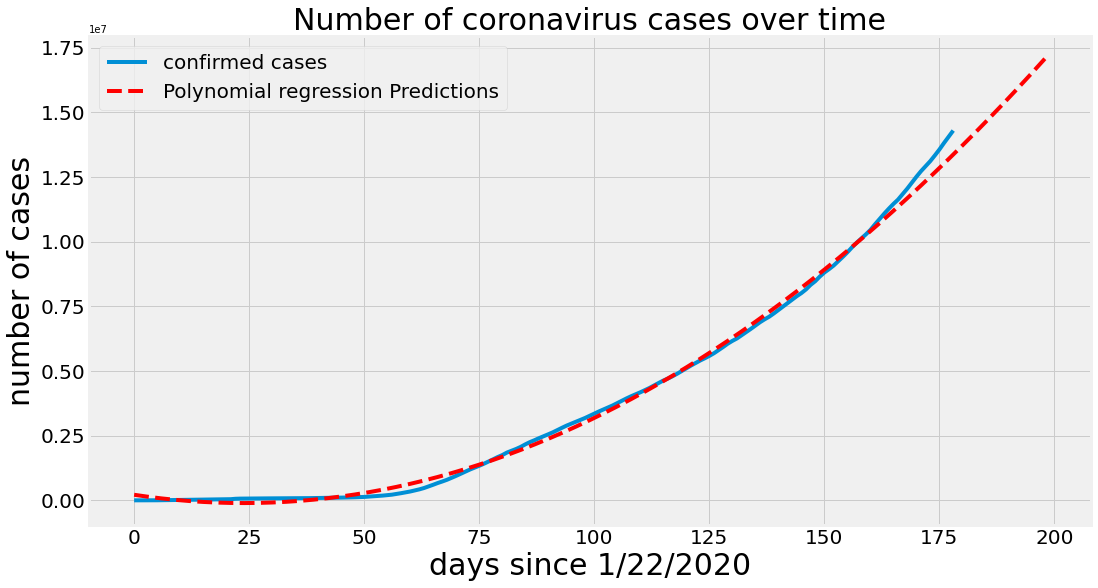

In [57]:
plot_predictions(adjusted_dates,world_cases,linear_pred,'Polynomial regression Predictions','red')


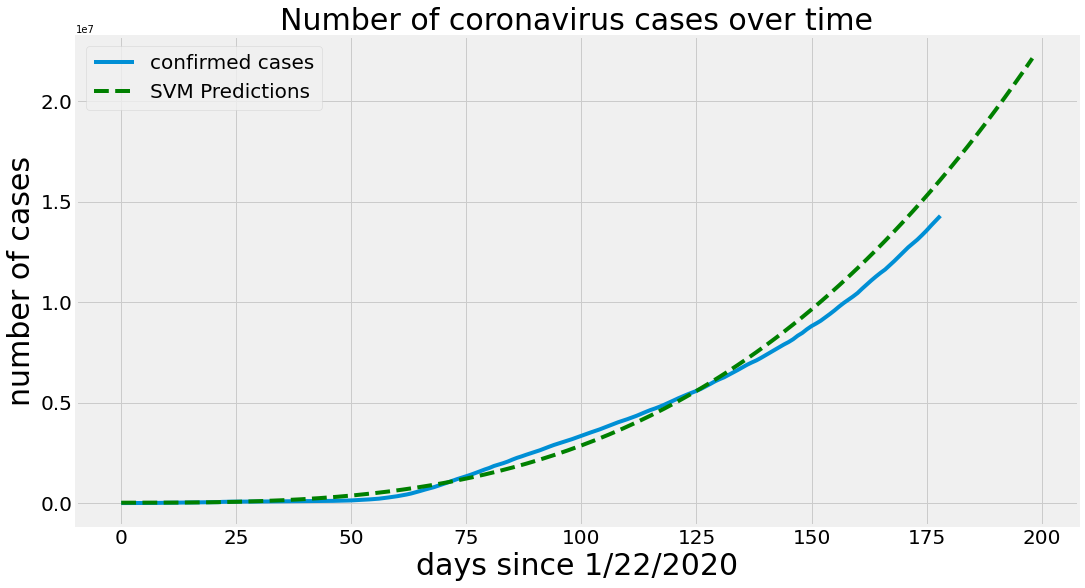

In [58]:
plot_predictions(adjusted_dates,world_cases,svm_pred,'SVM Predictions','green')

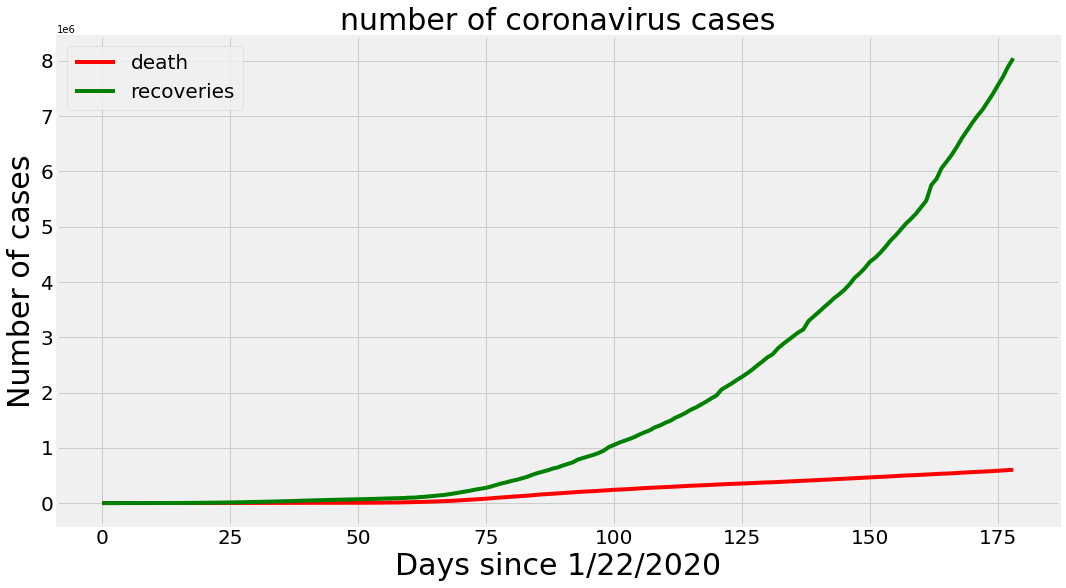

In [59]:
plt.figure(figsize=(16,9))
plt.plot(adjusted_dates,total_deaths,color='r')
plt.plot(adjusted_dates,total_recovered,color='green')
plt.legend(['death','recoveries'],loc='best',fontsize=20)
plt.title('number of coronavirus cases',size=30)
plt.xlabel('Days since 1/22/2020',size=30)
plt.ylabel('Number of cases',size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()



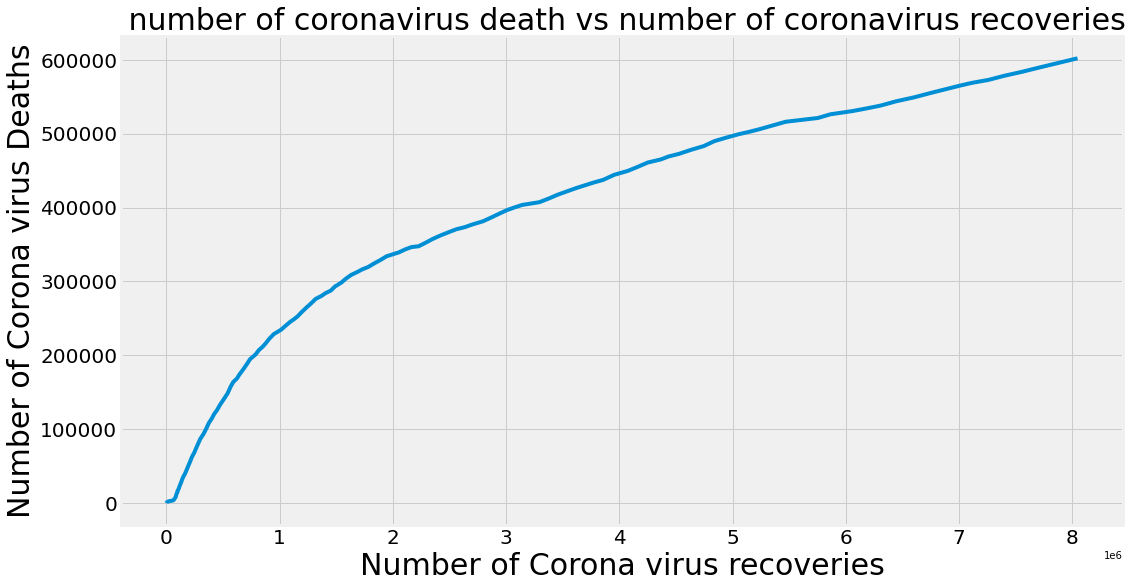

In [60]:
plt.figure(figsize=(16,9))
plt.plot(total_recovered,total_deaths)
plt.title(' number of coronavirus death vs number of coronavirus recoveries',size=30)
plt.xlabel('Number of Corona virus recoveries',size=30) 
plt.ylabel('Number of Corona virus Deaths',size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()